In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect =True)


In [8]:
#returns what tables there are


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Climate Analysis

2017-08-23
2016-08-23 00:00:00


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

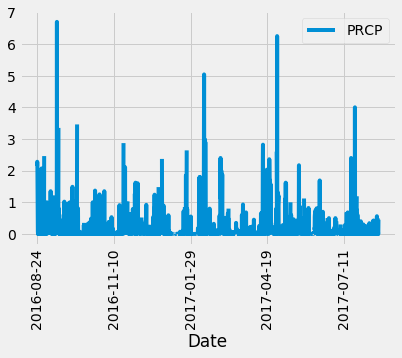

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date[0])
# Calculate the date 1 year ago from the last data point in the database
year_ago=dt.datetime.strptime(last_date[0],"%Y-%m-%d")-dt.timedelta(days=365)
print(year_ago)
# Perform a query to retrieve the data and precipitation scores
year_ago_prcp=session.query(measurement.prcp, measurement.date).filter(measurement.date >=year_ago).all()
year_ago_prcp
# Save the query results as a Pandas DataFrame and set the index to the date column
df_year_ago_prcp=pd.DataFrame(year_ago_prcp, columns=['PRCP','Date'])
df_year_ago_prcp.set_index('Date', inplace=True)
df_year_ago_prcp.head()
# Sort the dataframe by date
df_year_ago_prcp=df_year_ago_prcp.sort_values('Date')
df_year_ago_prcp.head()

# Use Pandas Plotting with Matplotlib to plot the data
df_year_ago_prcp.plot()
plt.xticks(rotation=90)



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_year_ago_prcp.describe()

,PRCP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()


[(9)]

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#SELECT station, COUNT * FROM measurement GROUPBY station
session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc())\
    .all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


#SELECT MIN temp, MAX temp, AVG temp FROM measurement WHERE station = USC00519281
session.query(func.min(measurement.tobs)\
    ,func.max(measurement.tobs)\
    ,func.avg(measurement.tobs))\
    .filter(measurement.station == 'USC00519281')\
    .all()

[(54.0, 85.0, 71.66378066378067)]

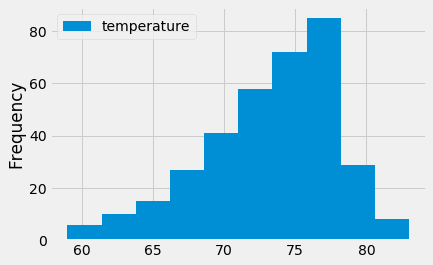

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_year_ago=session.query(measurement.tobs)\
    .filter(measurement.station == 'USC00519281')\
    .filter(measurement.date >=year_ago)\
    .all()
temps_year_ago = pd.DataFrame(temps_year_ago, columns=['temperature'])

temps_year_ago.plot.hist()
plt.show()

## Bonus Challenge Assignment

In [21]:
 hat =session.query(func.min(measurement.tobs)\
        ,func.max(measurement.tobs)\
        ,func.avg(measurement.tobs))\
        .filter(measurement.date>="2017-04-19")\
        .all()
print(list(np.ravel(hat)))

[58.0, 87.0, 76.83608815426997]


In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [1]:
 hat =session.query(func.min(measurement.tobs)\
        ,func.max(measurement.tobs)\
        ,func.avg(measurement.tobs))\
        .filter(measurement.date>=start)\
        .all()

NameError: name 'session' is not defined

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
